MEDICAL INSURANCE COST PREDICION 

About the Dataset-

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [95]:
#conda install dython

In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xg
from sklearn.neural_network import MLPRegressor
import optuna
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

In [2]:
#importing the dataset into a dataframe
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

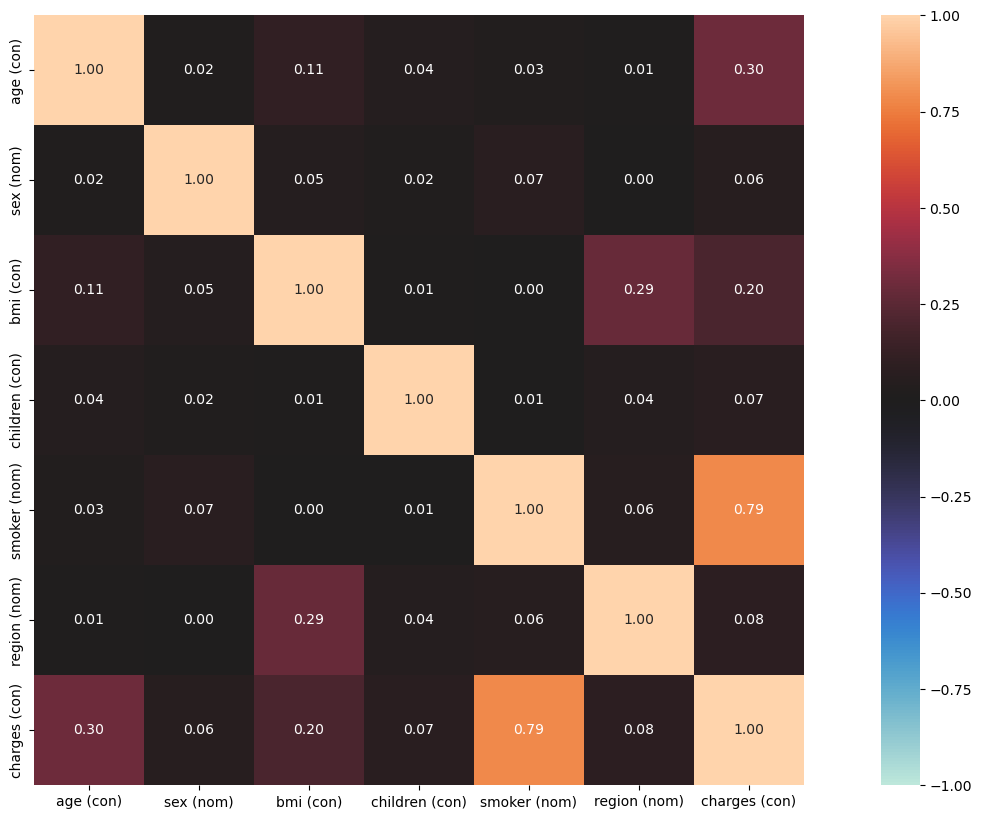

{'corr':                 age (con)  sex (nom)  bmi (con)  children (con)  smoker (nom)  \
 age (con)        1.000000   0.020856   0.109272        0.042469      0.025019   
 sex (nom)        0.020856   1.000000   0.046371        0.017163      0.069145   
 bmi (con)        0.109272   0.046371   1.000000        0.012759      0.003750   
 children (con)   0.042469   0.017163   0.012759        1.000000      0.007673   
 smoker (nom)     0.025019   0.069145   0.003750        0.007673      1.000000   
 region (nom)     0.013394   0.000000   0.285612        0.040137      0.056982   
 charges (con)    0.299008   0.057292   0.198341        0.067998      0.787251   
 
                 region (nom)  charges (con)  
 age (con)           0.013394       0.299008  
 sex (nom)           0.000000       0.057292  
 bmi (con)           0.285612       0.198341  
 children (con)      0.040137       0.067998  
 smoker (nom)        0.056982       0.787251  
 region (nom)        1.000000       0.081449  
 char

In [8]:
associations(data,figsize=(20,10),mark_columns=True)

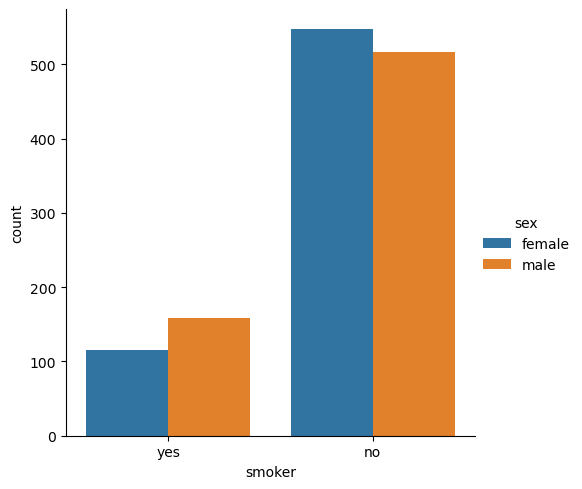

In [9]:
sns.catplot(x="smoker", kind="count",hue = 'sex',  data=data)

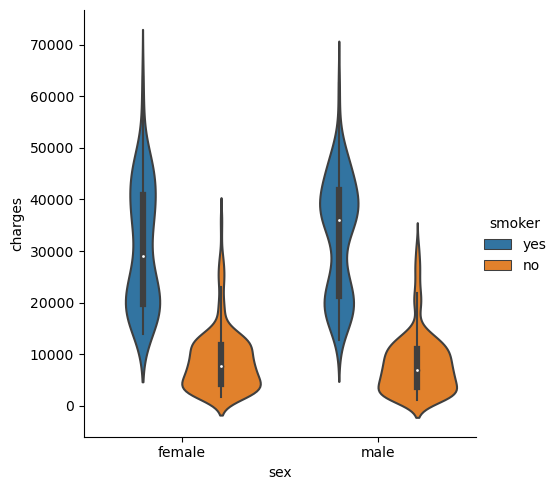

In [10]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data,)

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

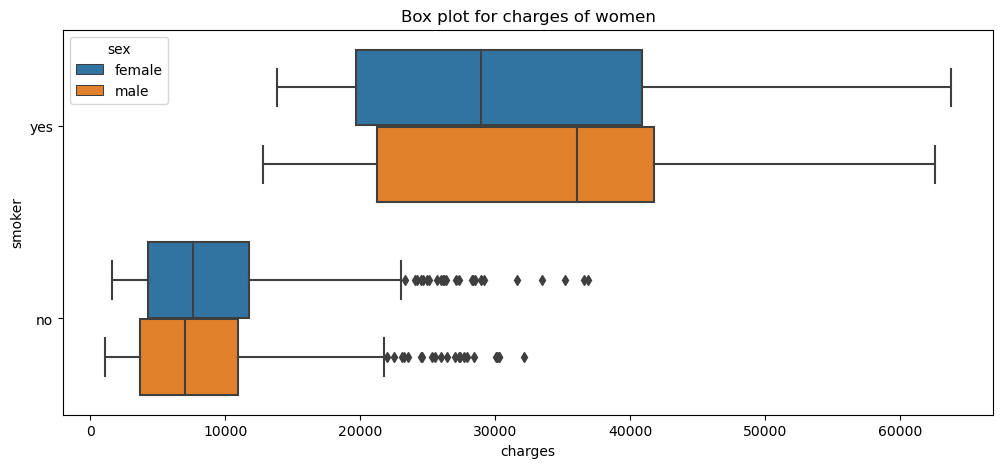

In [11]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(data=data,y="smoker", x="charges",hue="sex")

NameError: name 'ax' is not defined

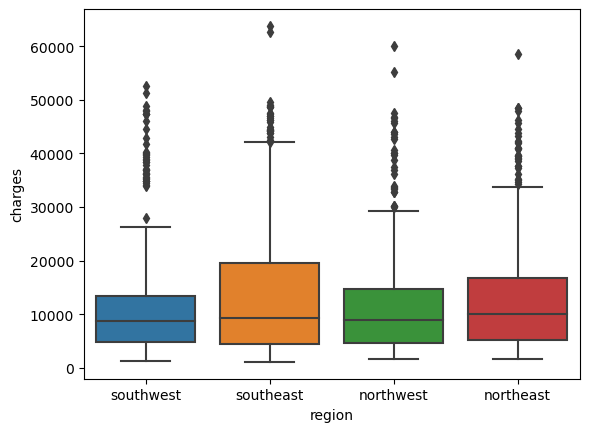

In [12]:
sns.boxplot(x="region", y="charges", data=data)
ax.set_title('Region affect on charges')

### FEATURE SCALING

#### CREATE DUMMY VARIABLES FOR CATEGORICAL FEATURES

In [ ]:
df=data.copy()

In [13]:
df=pd.get_dummies(data, columns=['region', 'sex','smoker'],drop_first=True)

In [14]:
df.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


#### SPLITTING DATA 

In [15]:
#splitting the parameters and target variable
X = df.drop(columns='charges',axis=1)
Y = df['charges']

### MODELLING

### LINEAR REGRESSION WITH POLY DEGREE

In [25]:
#### SCALING DATA 

In [26]:
from  sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [29]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
plr = LinearRegression().fit(X_train_std,Y_train)

Y_train_pred = plr.predict(X_train_std)
pred = plr.predict(X_test_std)



In [31]:

print("r2 score:",metrics.r2_score(y_test,pred))

r2 score: 0.880346556387537


In [32]:
#### TRYING DEGREE=3
poly = PolynomialFeatures (degree = 3)
x_poly = poly.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_poly,Y, random_state = 0)
poly2= LinearRegression().fit(X_train,Y_train)

preds = poly2.predict(X_test)

print("r2 score:",metrics.r2_score(Y_test,preds))

r2 score: 0.8670760976623609


In [33]:
#### FOR DEGREE=4
poly = PolynomialFeatures (degree = 4)
x_poly = poly.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_poly,Y, random_state = 0)

polyreg3 = LinearRegression().fit(X_train,Y_train)

preds = polyreg3.predict(X_test)

print("r2 score:",metrics.r2_score(Y_test,preds))

r2 score: 0.7939681652680216


### NOTE= The data set does not include too much features and its size is small so using basic model like Linear regression and smaller poly degree can be proper for getting higher R2 score.

### TRYING DIFFERENT REGRESSION MODEL

In [34]:
#train test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 8) (1070, 8) (268, 8)


In [36]:
models = {"GBR": GradientBoostingRegressor(random_state=0),
          "XGB": xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123), 
          "Decision Tree": DecisionTreeRegressor(random_state=0),
          "Random Forest": RandomForestRegressor(n_estimators = 100,criterion = 'mse',random_state = 1),
          "LGB": lgb.LGBMRegressor(),
          "MLP": MLPRegressor(random_state=42, max_iter=300,hidden_layer_sizes=(200,200,200),learning_rate='adaptive')}

def fit_and_score(models, X_train, X_test, y_train, y_test):
 
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():

        model.fit(X_train, y_train)
        preds= model.predict(X_test)

        model_scores[name]= metrics.r2_score(y_test,preds)

    return model_scores

In [37]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

[21:06:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


{'GBR': 0.8612718415053463,
 'XGB': 0.8524350329457817,
 'Decision Tree': 0.6971275835887006,
 'Random Forest': 0.8366257761464877,
 'LGB': 0.8416178429056451,
 'MLP': 0.7945672355544942}

NOTE= We can use Gradient Boosting or XGBoost Regressor 

### XGB MODELLING 

In [71]:
# Build model with parameters for Optuna
def objective(trial):

    param = {
        
        # hyperparameter settings
        
        'max_depth': trial.suggest_int('max_depth', 1, 17),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'subsample': trial.suggest_float('subsample', 0.01, 0.65),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.95),
        "reg_alpha":trial.suggest_float("reg_alpha",0.1,0.5),
        "reg_lambda":trial.suggest_float("reg_lambda",0.1,0.5),
        
        # non-hyperparameter settings
        
        "n_jobs":-1, # deploy 100% of gpu's computational power 
        "random_state":42
    }
    
    xgb_model =xg.XGBRegressor(**param,objective ='reg:squarederror')  
    
    xgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False,verbose=0)
    
    preds = xgb_model.predict(X_test)
    
    score=metrics.r2_score(y_test,preds)

    return score


SyntaxError: keyword argument repeated: verbose (2779346113.py, line 24)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
study.trials_dataframe()

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
Best_trial = study.best_trial.params
Best_trial

In [72]:
best_xgb=xg.XGBRegressor(**Best_trial)

In [73]:
best_xgb.fit(X_train,y_train)

[21:07:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_features='auto',
             max_leaves=None, min_child_weight=None, min_samples_leaf=4,
             min_samples_split=12, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, ...)

In [74]:
xgb_preds = best_xgb.predict(X_test)
    


In [75]:
xgb_score=metrics.r2_score(y_test,xgb_preds)
print("Score:",xgb_score)

Score: 0.8603605892815096


### GRADIENT BOOSTING REGRESSOR 

In [76]:
def objective(trial):

    param = {
        'subsample': trial.suggest_categorical('subsample', [0.1,0.2,0.5, 0.7, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.0001, 0.001, 0.01, 0.1, 1.0]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300,500,1000,1200,1300,1500,1700,2000]),
        'max_depth': trial.suggest_categorical('max_depth', [3,5,6,7,10,12]), 
        'random_state': trial.suggest_categorical('random_state', [2023]),
    }
    grad =GradientBoostingRegressor(**param)  
    
    grad.fit(X_train,y_train)
    
    preds = grad.predict(X_test)
    
    score=metrics.r2_score(y_test,preds)

    return score

In [77]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-29 21:08:01,093] A new study created in memory with name: no-name-e3001222-ab89-4e33-bfc2-708bd7ad318e
[I 2023-04-29 21:08:01,791] Trial 0 finished with value: 0.8422354155267711 and parameters: {'subsample': 0.1, 'learning_rate': 0.001, 'n_estimators': 2000, 'max_depth': 6, 'random_state': 2023}. Best is trial 0 with value: 0.8422354155267711.
[I 2023-04-29 21:08:02,986] Trial 1 finished with value: 0.8233559459412423 and parameters: {'subsample': 1.0, 'learning_rate': 0.1, 'n_estimators': 1200, 'max_depth': 6, 'random_state': 2023}. Best is trial 0 with value: 0.8422354155267711.
[I 2023-04-29 21:08:03,933] Trial 2 finished with value: -7.875931260255946e+189 and parameters: {'subsample': 0.2, 'learning_rate': 1.0, 'n_estimators': 1500, 'max_depth': 12, 'random_state': 2023}. Best is trial 0 with value: 0.8422354155267711.
[I 2023-04-29 21:08:06,156] Trial 3 finished with value: 0.7653244484946966 and parameters: {'subsample': 1.0, 'learning_rate': 0.1, 'n_estimators': 150

Number of finished trials: 30
Best trial: {'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 2000, 'max_depth': 5, 'random_state': 2023}


In [78]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_max_depth,params_n_estimators,params_random_state,params_subsample,state
0,0,8.422354e-01,2023-04-29 21:08:01.098434,2023-04-29 21:08:01.791604,0 days 00:00:00.693170,0.0010,6,2000,2023,0.1,COMPLETE
1,1,8.233559e-01,2023-04-29 21:08:01.792366,2023-04-29 21:08:02.986675,0 days 00:00:01.194309,0.1000,6,1200,2023,1.0,COMPLETE
2,2,-7.875931e+189,2023-04-29 21:08:02.987387,2023-04-29 21:08:03.933099,0 days 00:00:00.945712,1.0000,12,1500,2023,0.2,COMPLETE
3,3,7.653244e-01,2023-04-29 21:08:03.933825,2023-04-29 21:08:06.156416,0 days 00:00:02.222591,0.1000,12,1500,2023,1.0,COMPLETE
4,4,8.050166e-01,2023-04-29 21:08:06.157140,2023-04-29 21:08:08.036446,0 days 00:00:01.879306,0.0010,12,1500,2023,0.5,COMPLETE
5,5,7.832967e-01,2023-04-29 21:08:08.037187,2023-04-29 21:08:09.868697,0 days 00:00:01.831510,0.0010,10,1300,2023,0.7,COMPLETE
6,6,8.377455e-01,2023-04-29 21:08:09.869409,2023-04-29 21:08:11.160182,0 days 00:00:01.290773,0.0010,12,2000,2023,0.2,COMPLETE
7,7,7.068816e-01,2023-04-29 21:08:11.160913,2023-04-29 21:08:12.776662,0 days 00:00:01.615749,1.0000,12,1300,2023,1.0,COMPLETE
8,8,3.839305e-01,2023-04-29 21:08:12.777351,2023-04-29 21:08:12.973660,0 days 00:00:00.196309,0.0010,12,300,2023,0.2,COMPLETE
9,9,7.832967e-01,2023-04-29 21:08:12.974362,2023-04-29 21:08:14.803515,0 days 00:00:01.829153,0.0010,10,1300,2023,0.7,COMPLETE


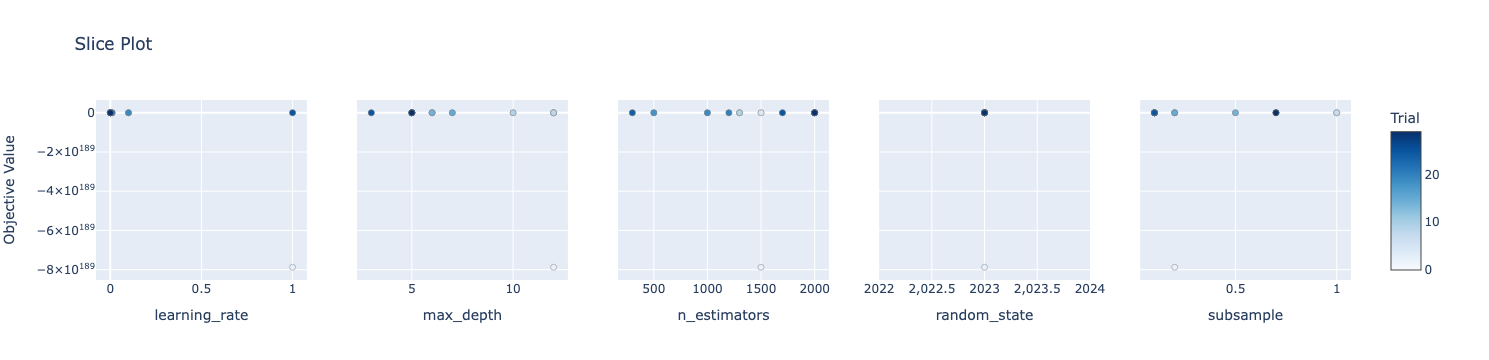

In [79]:
optuna.visualization.plot_slice(study)

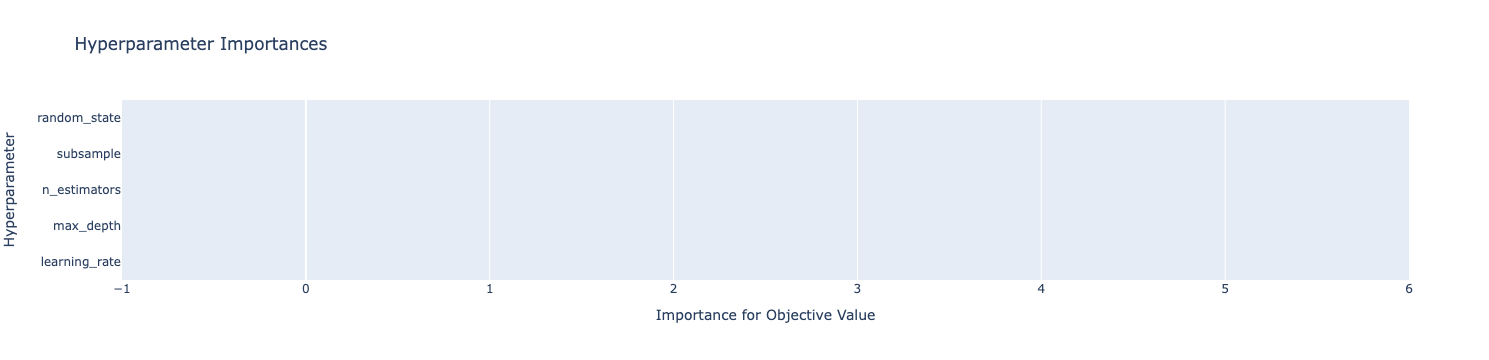

In [80]:
optuna.visualization.plot_param_importances(study)

In [81]:
Best_trial = study.best_trial.params
Best_trial

{'subsample': 0.7,
 'learning_rate': 0.001,
 'n_estimators': 2000,
 'max_depth': 5,
 'random_state': 2023}

In [82]:
gbm_bestgrad=GradientBoostingRegressor(**Best_trial)

In [83]:
gbm_bestgrad.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.001, max_depth=5, n_estimators=2000,
                          random_state=2023, subsample=0.7)

In [84]:
gbm_preds = gbm_bestgrad.predict(X_test)
    

In [85]:
gbm_score=metrics.r2_score(y_test,gbm_preds)
print("Score:",gbm_score)

Score: 0.8464510121985086


### RANDOMFOREST REGRESSOR

In [86]:
# Build model with parameters for Optuna
def objective(trial):

    param = {
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1,3,4,5,10] ),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt'] ),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2,4,6,10,12,15,20,25]),
        'n_estimators': trial.suggest_categorical('n_estimators', [50,100,500,1000,1500]),
        'max_depth': trial.suggest_categorical('max_depth', [3,5,7,10,12]), 
    }
    forest =RandomForestRegressor(**param)  
    
    forest.fit(X_train,y_train)
    
    preds = forest.predict(X_test)
    
    score=metrics.r2_score(y_test,preds)

    return score

In [87]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-29 21:08:30,715] A new study created in memory with name: no-name-457c1b6c-7841-40e4-bf52-7fadb3ad5b32
[I 2023-04-29 21:08:30,802] Trial 0 finished with value: 0.8020423839080224 and parameters: {'min_samples_leaf': 4, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 100, 'max_depth': 12}. Best is trial 0 with value: 0.8020423839080224.
[I 2023-04-29 21:08:31,976] Trial 1 finished with value: 0.815988489615518 and parameters: {'min_samples_leaf': 3, 'max_features': 'sqrt', 'min_samples_split': 12, 'n_estimators': 1500, 'max_depth': 7}. Best is trial 1 with value: 0.815988489615518.
[I 2023-04-29 21:08:33,261] Trial 2 finished with value: 0.8321472333435256 and parameters: {'min_samples_leaf': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1500, 'max_depth': 12}. Best is trial 2 with value: 0.8321472333435256.
[I 2023-04-29 21:08:33,319] Trial 3 finished with value: 0.8635000231031794 and parameters: {'min_samples_leaf': 4, 'max_features':

Number of finished trials: 30
Best trial: {'min_samples_leaf': 4, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 500, 'max_depth': 5}


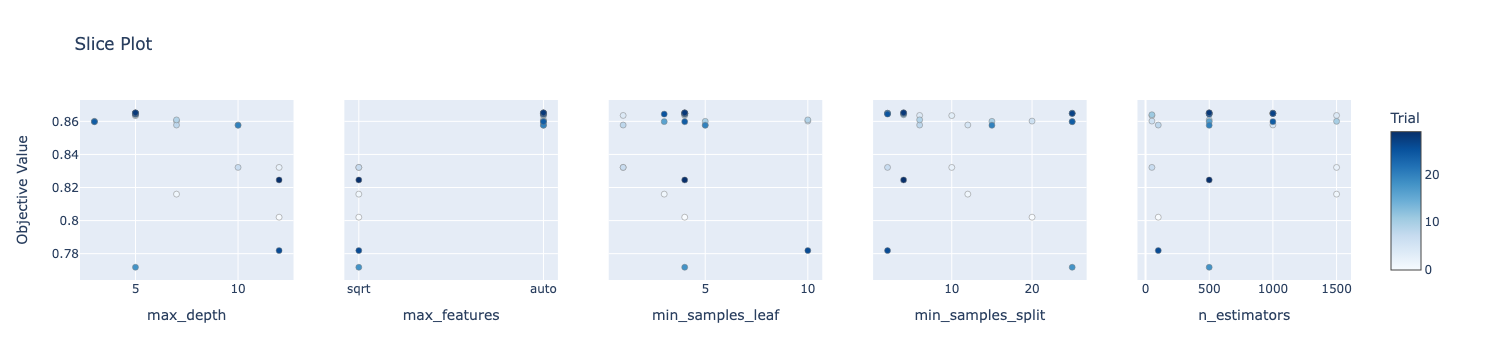

In [88]:
optuna.visualization.plot_slice(study)

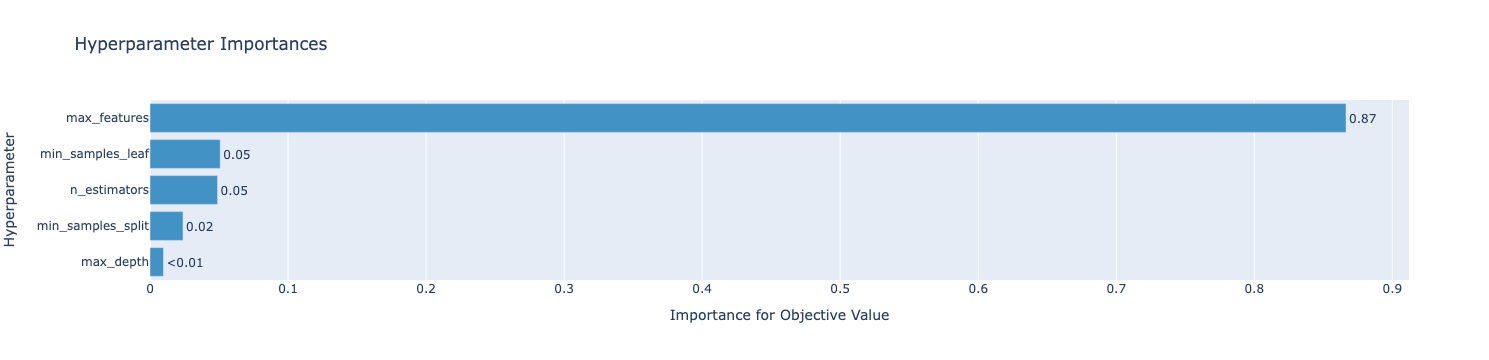

In [89]:
optuna.visualization.plot_param_importances(study)

In [90]:
Best_trial = study.best_trial.params
Best_trial

{'min_samples_leaf': 4,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 500,
 'max_depth': 5}

In [91]:
bestforest=RandomForestRegressor(**Best_trial)

In [92]:
bestforest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=500)

In [93]:
forest_preds=bestforest.predict(X_test)

In [94]:
forest_score=metrics.r2_score(y_test,forest_preds)
print("Score:",forest_score)

Score: 0.8642338090482975


### LIGHT GBM MODEL

In [95]:
def objective(trial):
    params = {
        # Hyperparameter settings
        "n_estimators": trial.suggest_int("n_estimators", 500,1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 6, 300, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 0.95),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95),
        # non-hyperparameter settings
        "n_jobs":-1,
        "random_state":42
    }
    
    model =lgb.LGBMRegressor(**params)  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    preds = model.predict(X_test)
    score=metrics.r2_score(y_test,preds)

    return score

In [96]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-29 21:08:51,394] A new study created in memory with name: no-name-d1411236-d459-4b41-8703-d6a8d4051daf
[I 2023-04-29 21:08:51,420] Trial 0 finished with value: 0.1231941522058484 and parameters: {'n_estimators': 900, 'learning_rate': 0.23552945160186425, 'num_leaves': 186, 'max_depth': 4, 'min_data_in_leaf': 300, 'min_gain_to_split': 9.929898247616674, 'bagging_fraction': 0.8737675386426994, 'max_bin': 272, 'lambda_l1': 50, 'lambda_l2': 0, 'bagging_freq': 1, 'feature_fraction': 0.8479039942481497}. Best is trial 0 with value: 0.1231941522058484.
[I 2023-04-29 21:08:51,435] Trial 1 finished with value: -0.0021983848732662903 and parameters: {'n_estimators': 500, 'learning_rate': 0.1205213117682522, 'num_leaves': 286, 'max_depth': 9, 'min_data_in_leaf': 1000, 'min_gain_to_split': 5.814803399181358, 'bagging_fraction': 0.527095877140725, 'max_bin': 266, 'lambda_l1': 70, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.29577073422588607}. Best is trial 0 with value: 0.1

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=9.929898247616674, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.929898247616674
[LightGBM] [Warning] feature_fraction is set=0.8479039942481497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8479039942481497
[LightGBM] [Warning] bagging_fraction is set=0.8737675386426994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8737675386426994
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[Light

[I 2023-04-29 21:08:51,611] Trial 7 finished with value: -0.0021983848732662903 and parameters: {'n_estimators': 700, 'learning_rate': 0.2485597567228313, 'num_leaves': 166, 'max_depth': 12, 'min_data_in_leaf': 400, 'min_gain_to_split': 10.693183748240552, 'bagging_fraction': 0.5178721381123041, 'max_bin': 211, 'lambda_l1': 10, 'lambda_l2': 95, 'bagging_freq': 1, 'feature_fraction': 0.3955326780403994}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:51,634] Trial 8 finished with value: -0.0021983848732662903 and parameters: {'n_estimators': 600, 'learning_rate': 0.20190532779263126, 'num_leaves': 146, 'max_depth': 11, 'min_data_in_leaf': 800, 'min_gain_to_split': 4.364942078571482, 'bagging_fraction': 0.6723007292097883, 'max_bin': 230, 'lambda_l1': 5, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.31239438923508833}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:51,683] Trial 9 finished with value: -1.0233047150967773 and parameter

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=4.364942078571482, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.364942078571482
[LightGBM] [Warning] feature_fraction is set=0.31239438923508833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.31239438923508833
[LightGBM] [Warning] bagging_fraction is set=0.6723007292097883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6723007292097883
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[Lig

[I 2023-04-29 21:08:51,840] Trial 10 finished with value: 0.7628989231487844 and parameters: {'n_estimators': 500, 'learning_rate': 0.016098594893167534, 'num_leaves': 66, 'max_depth': 19, 'min_data_in_leaf': 100, 'min_gain_to_split': 9.30936531403518, 'bagging_fraction': 0.7156329683348528, 'max_bin': 290, 'lambda_l1': 95, 'lambda_l2': 60, 'bagging_freq': 1, 'feature_fraction': 0.6671315601326927}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:52,041] Trial 11 finished with value: 0.8074891281331884 and parameters: {'n_estimators': 500, 'learning_rate': 0.04322820037581218, 'num_leaves': 46, 'max_depth': 20, 'min_data_in_leaf': 100, 'min_gain_to_split': 9.334898608685737, 'bagging_fraction': 0.7111930149980547, 'max_bin': 300, 'lambda_l1': 100, 'lambda_l2': 65, 'bagging_freq': 1, 'feature_fraction': 0.6681012112942906}. Best is trial 6 with value: 0.8541897080734249.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=9.334898608685737, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.334898608685737
[LightGBM] [Warning] feature_fraction is set=0.6681012112942906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6681012112942906
[LightGBM] [Warning] bagging_fraction is set=0.7111930149980547, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7111930149980547
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[L

[I 2023-04-29 21:08:52,164] Trial 12 finished with value: 0.8487967733939408 and parameters: {'n_estimators': 500, 'learning_rate': 0.4990002738731757, 'num_leaves': 6, 'max_depth': 20, 'min_data_in_leaf': 100, 'min_gain_to_split': 8.198578826142622, 'bagging_fraction': 0.6346931996718856, 'max_bin': 281, 'lambda_l1': 100, 'lambda_l2': 70, 'bagging_freq': 1, 'feature_fraction': 0.7188578542075965}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:52,240] Trial 13 finished with value: 0.8507039989313847 and parameters: {'n_estimators': 600, 'learning_rate': 0.4927293339763884, 'num_leaves': 6, 'max_depth': 16, 'min_data_in_leaf': 100, 'min_gain_to_split': 8.221847313652656, 'bagging_fraction': 0.622706316004358, 'max_bin': 279, 'lambda_l1': 85, 'lambda_l2': 5, 'bagging_freq': 1, 'feature_fraction': 0.7447851112072659}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:52,288] Trial 14 finished with value: -0.0021983848732662903 and parameters: {'n_es

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=8.221847313652656, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.221847313652656
[LightGBM] [Warning] feature_fraction is set=0.7447851112072659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7447851112072659
[LightGBM] [Warning] bagging_fraction is set=0.622706316004358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.622706316004358
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGB

[I 2023-04-29 21:08:52,397] Trial 16 finished with value: -0.0021983848732662903 and parameters: {'n_estimators': 700, 'learning_rate': 0.44846236541446916, 'num_leaves': 106, 'max_depth': 15, 'min_data_in_leaf': 600, 'min_gain_to_split': 11.703663583944937, 'bagging_fraction': 0.6577376460719853, 'max_bin': 202, 'lambda_l1': 40, 'lambda_l2': 35, 'bagging_freq': 1, 'feature_fraction': 0.7913873498987485}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:52,439] Trial 17 finished with value: -0.0021983848732662903 and parameters: {'n_estimators': 1000, 'learning_rate': 0.4918615326022848, 'num_leaves': 6, 'max_depth': 6, 'min_data_in_leaf': 500, 'min_gain_to_split': 6.721207886103776, 'bagging_fraction': 0.580502006851317, 'max_bin': 250, 'lambda_l1': 70, 'lambda_l2': 10, 'bagging_freq': 1, 'feature_fraction': 0.5473984430661822}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:52,501] Trial 18 finished with value: 0.12690198394441932 and parameter

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=6.721207886103776, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.721207886103776
[LightGBM] [Warning] feature_fraction is set=0.5473984430661822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5473984430661822
[LightGBM] [Warning] bagging_fraction is set=0.580502006851317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.580502006851317
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[Light

[I 2023-04-29 21:08:52,703] Trial 21 finished with value: 0.8520812470063412 and parameters: {'n_estimators': 500, 'learning_rate': 0.49607006236358175, 'num_leaves': 6, 'max_depth': 19, 'min_data_in_leaf': 100, 'min_gain_to_split': 8.153042254730654, 'bagging_fraction': 0.6232180098387424, 'max_bin': 284, 'lambda_l1': 100, 'lambda_l2': 70, 'bagging_freq': 1, 'feature_fraction': 0.7162865436250541}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:52,828] Trial 22 finished with value: 0.8472362021125371 and parameters: {'n_estimators': 500, 'learning_rate': 0.4806595882955076, 'num_leaves': 26, 'max_depth': 18, 'min_data_in_leaf': 100, 'min_gain_to_split': 8.2192735284551, 'bagging_fraction': 0.5621406266922607, 'max_bin': 285, 'lambda_l1': 85, 'lambda_l2': 75, 'bagging_freq': 1, 'feature_fraction': 0.7261136473362818}. Best is trial 6 with value: 0.8541897080734249.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=8.153042254730654, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.153042254730654
[LightGBM] [Warning] feature_fraction is set=0.7162865436250541, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7162865436250541
[LightGBM] [Warning] bagging_fraction is set=0.6232180098387424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6232180098387424
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[L

[I 2023-04-29 21:08:52,897] Trial 23 finished with value: 0.1227457295449289 and parameters: {'n_estimators': 600, 'learning_rate': 0.40636736725088707, 'num_leaves': 6, 'max_depth': 18, 'min_data_in_leaf': 200, 'min_gain_to_split': 6.139189168983339, 'bagging_fraction': 0.6797319904029451, 'max_bin': 271, 'lambda_l1': 90, 'lambda_l2': 100, 'bagging_freq': 1, 'feature_fraction': 0.8145698002502862}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:52,946] Trial 24 finished with value: -0.0021983848732662903 and parameters: {'n_estimators': 500, 'learning_rate': 0.4592748821036025, 'num_leaves': 106, 'max_depth': 15, 'min_data_in_leaf': 400, 'min_gain_to_split': 8.232183414344972, 'bagging_fraction': 0.6180955906462887, 'max_bin': 256, 'lambda_l1': 75, 'lambda_l2': 50, 'bagging_freq': 1, 'feature_fraction': 0.6717469261328245}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:53,048] Trial 25 finished with value: 0.8513219847317245 and parameters: {

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=6.139189168983339, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.139189168983339
[LightGBM] [Warning] feature_fraction is set=0.8145698002502862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8145698002502862
[LightGBM] [Warning] bagging_fraction is set=0.6797319904029451, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6797319904029451
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[L

[I 2023-04-29 21:08:53,104] Trial 26 finished with value: 0.12707893740212595 and parameters: {'n_estimators': 700, 'learning_rate': 0.4221573529852698, 'num_leaves': 46, 'max_depth': 18, 'min_data_in_leaf': 200, 'min_gain_to_split': 5.093028886508994, 'bagging_fraction': 0.6478732311233455, 'max_bin': 270, 'lambda_l1': 100, 'lambda_l2': 30, 'bagging_freq': 1, 'feature_fraction': 0.5741231417942533}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:53,153] Trial 27 finished with value: 0.11787926518637404 and parameters: {'n_estimators': 500, 'learning_rate': 0.39449948951158414, 'num_leaves': 66, 'max_depth': 13, 'min_data_in_leaf': 300, 'min_gain_to_split': 6.742006700631779, 'bagging_fraction': 0.6930835282722354, 'max_bin': 290, 'lambda_l1': 95, 'lambda_l2': 0, 'bagging_freq': 1, 'feature_fraction': 0.46955828121242416}. Best is trial 6 with value: 0.8541897080734249.
[I 2023-04-29 21:08:53,207] Trial 28 finished with value: -0.0021983848732662903 and parameters:

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=5.093028886508994, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.093028886508994
[LightGBM] [Warning] feature_fraction is set=0.5741231417942533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5741231417942533
[LightGBM] [Warning] bagging_fraction is set=0.6478732311233455, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6478732311233455
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[L

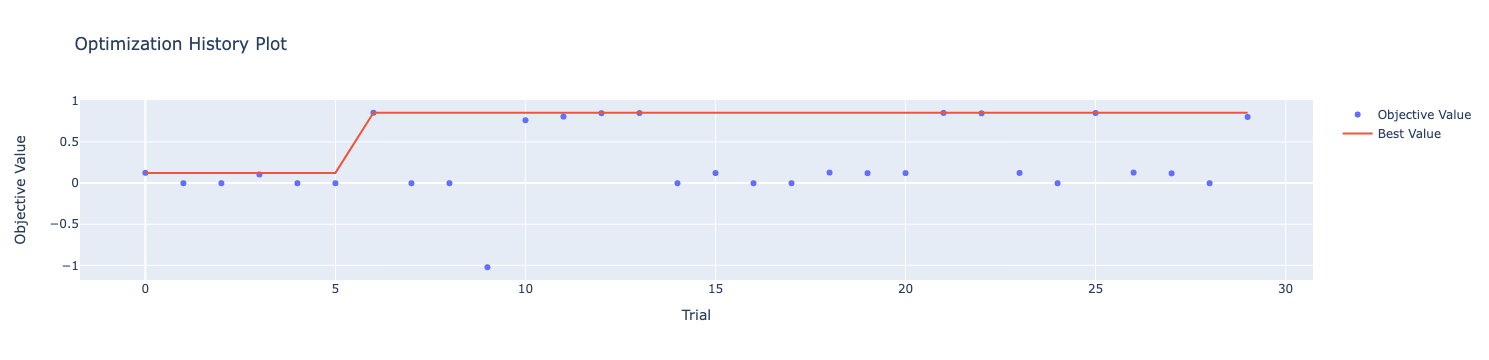

In [97]:
optuna.visualization.plot_optimization_history(study)

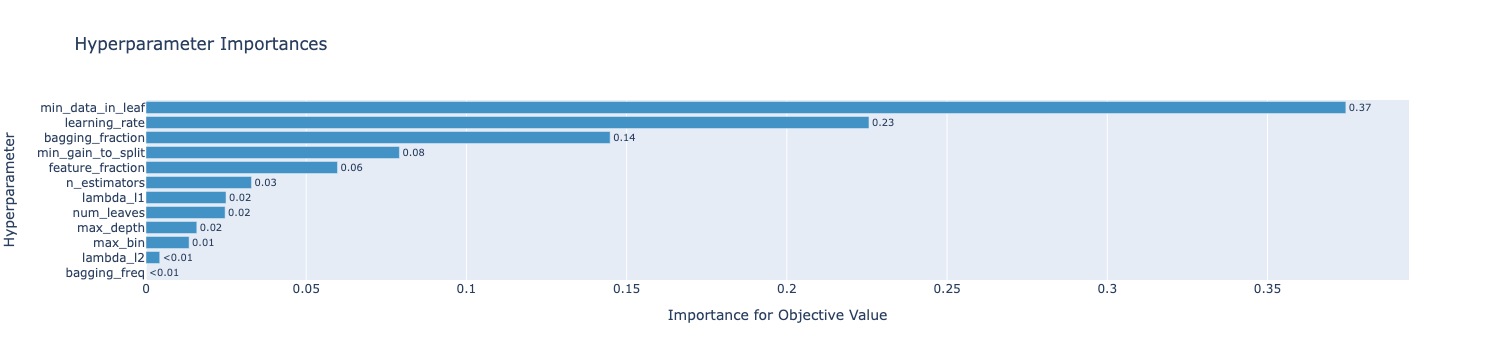

In [98]:
optuna.visualization.plot_param_importances(study)

In [99]:
Best_trial = study.best_trial.params
Best_trial

{'n_estimators': 500,
 'learning_rate': 0.45857342430478437,
 'num_leaves': 266,
 'max_depth': 3,
 'min_data_in_leaf': 100,
 'min_gain_to_split': 8.626671097693455,
 'bagging_fraction': 0.6575511971307663,
 'max_bin': 250,
 'lambda_l1': 85,
 'lambda_l2': 5,
 'bagging_freq': 1,
 'feature_fraction': 0.577453745155621}

In [100]:
lgbm= lgb.LGBMRegressor(**Best_trial)

lgbm.fit(X_train ,y_train)
pred = lgbm.predict(X_test)
r2score= metrics.r2_score(y_test, pred)
print("Score:" ,r2score)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] feature_fraction is set=0.577453745155621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.577453745155621
[LightGBM] [Warning] bagging_fraction is set=0.6575511971307663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6575511971307663
[LightGBM] [Warning] min_gain_to_split is set=8.626671097693455, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.626671097693455
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
Score: 0.8273950045850156


### NOTE= As seen above the best score belongs to Polynomial Regression so we save and load it for deployement this project

### SAVE MODEL THAT HAS BEST R2 SCORE 

In [108]:
import pickle

filename = 'model_forest.pkl'
pickle.dump(bestforest , open(filename,'wb')) 

In [109]:

model = pickle.load(open("model_forest.pkl","rb"))